## Observations and Insights

Type Markdown and LaTeX:  𝛼2

-From the tumor volume by regimen statistics provided it appears that Capomulin and Ramicane were the most effective in actively reducting tumor size
- Male rats tended to have a slighty higher survival rate compared to female rats
- While Capomulin and Ramicane had better results it also had much more varied results than some of the other regimens
- 

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combinedData.head()
timeinputstr = input("Enter timepoint of studies to analyze. Range between 0 and 45. Must be a multiple of 5: ")
timeinput = int(timeinputstr)

Enter timepoint of studies to analyze. Range between 0 and 45. Must be a multiple of 5: 45


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

endtimedf = combinedData.loc[combinedData["Timepoint"] == timeinput, :]
#regimenStats = combinedData.groupby(['Drug Regimen'])
finalDrugPoints = endtimedf.groupby(['Drug Regimen'])
DrugMean = finalDrugPoints["Tumor Volume (mm3)"].mean()
DrugMedian = finalDrugPoints["Tumor Volume (mm3)"].median()
DrugVariance = finalDrugPoints["Tumor Volume (mm3)"].var()
DrugSTDV = finalDrugPoints["Tumor Volume (mm3)"].std()
DrugSEM = finalDrugPoints["Tumor Volume (mm3)"].sem()
frame = { 'Mean (all mm3)': DrugMean, 'Median': DrugMedian, 'Variance': DrugVariance, 'Standard Deviation': DrugSTDV, 'Standard Error': DrugSEM} 
DrugResult = pd.DataFrame(frame) 
DrugResult

,Mean (all mm3),Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,36.236114,37.311846,31.460537,5.608969,1.223977
Ceftamin,64.132421,64.299830,10.585242,3.253497,0.902358
Infubinol,65.755562,66.083066,11.787426,3.433282,1.144427
Ketapril,70.662958,69.872251,23.229260,4.819674,1.453186
Naftisol,69.265506,69.563621,26.079104,5.106770,1.416363
Placebo,68.084082,69.042841,20.098783,4.483167,1.351726
Propriva,66.258529,64.957562,24.967290,4.996728,1.888586
Ramicane,34.955595,34.848627,30.101010,5.486439,1.226805
Stelasyn,68.438310,69.299149,27.340818,5.228845,1.576556


## Bar plots

Text(0, 0.5, 'Tumor Volume (mm3)')

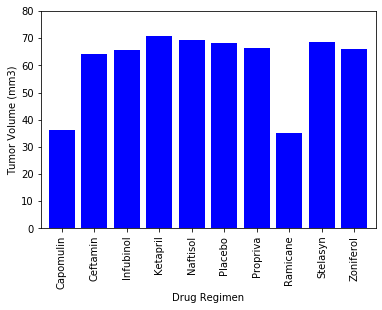

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
MeanPlot = DrugResult.plot(kind='bar', y='Mean (all mm3)', color='blue', ylim=(0,80), width=.8, legend=False)
MeanPlot.plot()
MeanPlot.set_ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Mean Tumor Size (mm3)')

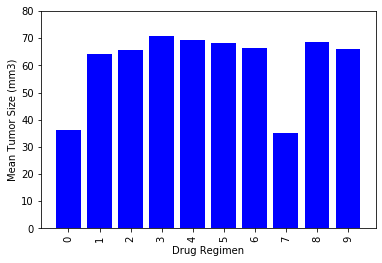

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(DrugResult))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, DrugResult["Mean (all mm3)"], color='blue')
plt.ylim(0, 80)
plt.xticks(tick_locations, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Mean Tumor Size (mm3)")

## Pie plots

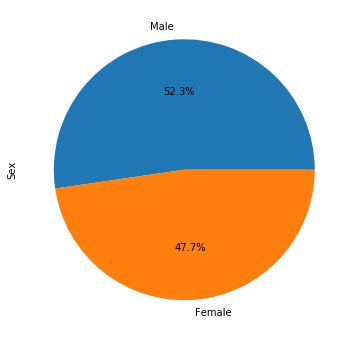

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
startData = combinedData.loc[combinedData["Timepoint"] == timeinput, :]
sexCounts = startData["Sex"].value_counts()
sexCounts.plot.pie(figsize=(6, 6), autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1c5923a4048>,
 [Text(-0.11951756723394155, 1.6456656863173882, 'Male'),
  Text(0.11951772131228254, -1.6456656751273389, 'Female')],
 [Text(-0.06519140030942265, 0.8976358289003934, '52.3%'),
  Text(0.0651914843521541, -0.8976358227967302, '47.7%')])

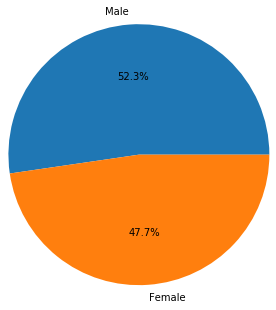

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
lables = ["Male","Female"]
plt.pie(sexCounts, autopct="%1.1f%%", labels=lables, radius=1.5)

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
endtime = combinedData.loc[combinedData["Timepoint"] == 45, :]
topfourlist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
topFour = pd.DataFrame()
for i in topfourlist:
    topFourhold = endtime.loc[endtime["Drug Regimen"] == i, :]
    topFour = topFour.append(topFourhold)
    
    quartiles = topFourhold["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {i} is: {lowerq}")
    print(f"The upper quartile of {i} is: {upperq}")
    print(f"The interquartile range of {i} is: {iqr}")
    print(f"The the median of {i} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("")
#format pulled from Quartiles activity

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The the median of Ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.

The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.68556862
The interquartile range of Infubinol is: 4.9311172099999965
The the median of Infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.

The lower quartile of Ceftamin is: 61.43389223
The upper quartile of Ceftamin is: 67.

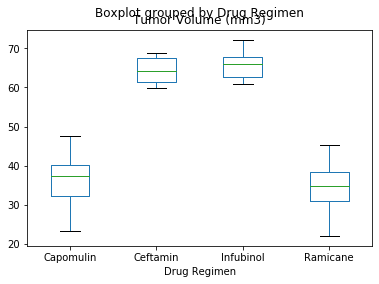

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
topFour.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False)

## Line and scatter plots

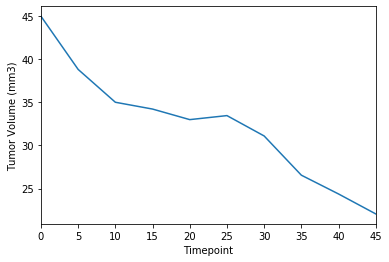

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
kmouse = combinedData.loc[combinedData["Mouse ID"] == "k403", :]
kplot = kmouse.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line', legend = False)
kplot.set_ylabel("Tumor Volume (mm3)")
kplot

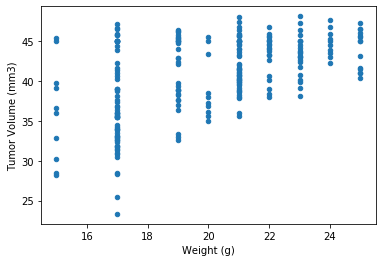

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capolumin1 = combinedData.loc[combinedData["Drug Regimen"] == "Capomulin", :]
capPlot = Capolumin1.plot(x ='Weight (g)', y='Tumor Volume (mm3)', kind = 'scatter', legend = False)

The correlation coefficient is: 0.53


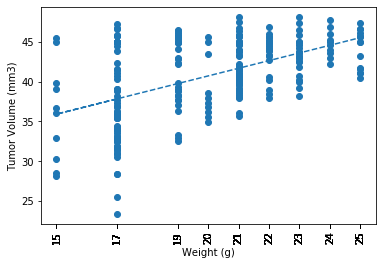

Line is y = 0.9609669432428346 x + 21.489827213299584


In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
CWeight = Capolumin1["Weight (g)"]
CVolume = Capolumin1["Tumor Volume (mm3)"]
corr = round(st.pearsonr(CWeight,CVolume)[0],2)
print(f"The correlation coefficient is: {corr}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(CWeight,CVolume)
cLine = slope * CWeight + intercept
plt.scatter(CWeight, CVolume)
plt.plot(CWeight, cLine,"--")
plt.xticks(CWeight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(f'Line is y = {slope} x + {intercept}')
# a little off but eh